#### Data from: https://finance.yahoo.com/quote/NVDA/

In [ ]:
import pandas as pd

df = pd.read_csv('/content/NVDA (1).csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
...,...,...,...,...,...,...,...
6389,2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500
6390,2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400
6391,2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
6392,2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1999-01-22,0.041016
1,1999-01-25,0.045313
2,1999-01-26,0.041797
3,1999-01-27,0.041667
4,1999-01-28,0.041536
...,...,...
6389,2024-06-13,129.610001
6390,2024-06-14,131.880005
6391,2024-06-17,130.979996
6392,2024-06-18,135.580002


In [ ]:
df['Date']

0       1999-01-22
1       1999-01-25
2       1999-01-26
3       1999-01-27
4       1999-01-28
           ...    
6389    2024-06-13
6390    2024-06-14
6391    2024-06-17
6392    2024-06-18
6393    2024-06-20
Name: Date, Length: 6394, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1999-01-22')
datetime_object

datetime.datetime(1999, 1, 22, 0, 0)

In [ ]:
df

,Date,Close
0,1999-01-22,0.041016
1,1999-01-25,0.045313
2,1999-01-26,0.041797
3,1999-01-27,0.041667
4,1999-01-28,0.041536
...,...,...
6389,2024-06-13,129.610001
6390,2024-06-14,131.880005
6391,2024-06-17,130.979996
6392,2024-06-18,135.580002


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-63-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1999-01-22
1      1999-01-25
2      1999-01-26
3      1999-01-27
4      1999-01-28
          ...    
6389   2024-06-13
6390   2024-06-14
6391   2024-06-17
6392   2024-06-18
6393   2024-06-20
Name: Date, Length: 6394, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1999-01-22,0.041016
1999-01-25,0.045313
1999-01-26,0.041797
1999-01-27,0.041667
1999-01-28,0.041536
...,...
2024-06-13,129.610001
2024-06-14,131.880005
2024-06-17,130.979996


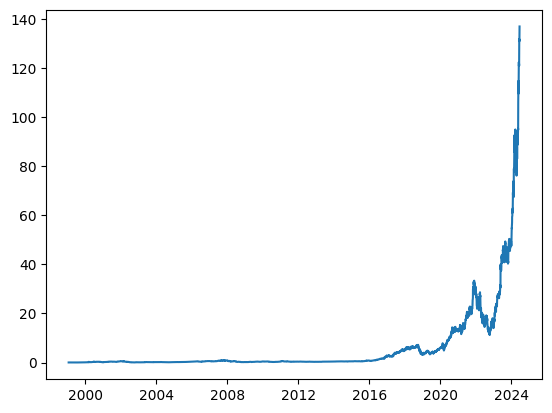

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-06-20'
windowed_df = df_to_windowed_df(df,
                                '2023-06-20',
                                '2024-05-20',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-06-20,42.997002,42.653000,42.692001,43.807999
1,2023-06-21,42.653000,42.692001,43.807999,43.044998
2,2023-06-22,42.692001,43.807999,43.044998,43.025002
3,2023-06-23,43.807999,43.044998,43.025002,42.209000
4,2023-06-26,43.044998,43.025002,42.209000,40.632000
...,...,...,...,...,...
227,2024-05-14,88.747002,89.877998,90.399002,91.356003
228,2024-05-15,89.877998,90.399002,91.356003,94.629997
229,2024-05-16,90.399002,91.356003,94.629997,94.359001
230,2024-05-17,91.356003,94.629997,94.359001,92.478996


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((232,), (232, 3, 1), (232,))

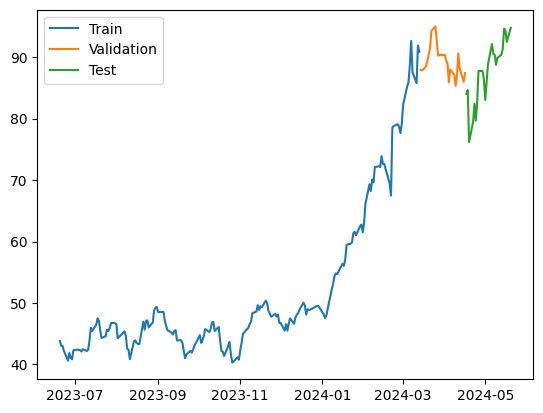

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 120ms/step - loss: 2813.2229 - mean_absolute_error: 51.5717 - val_loss: 7952.3799 - val_mean_absolute_error: 89.1425
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 2797.0891 - mean_absolute_error: 51.4157 - val_loss: 7929.1030 - val_mean_absolute_error: 89.0119
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 2783.1665 - mean_absolute_error: 51.2800 - val_loss: 7901.3423 - val_mean_absolute_error: 88.8558
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 2765.2849 - mean_absolute_error: 51.1050 - val_loss: 7864.8247 - val_mean_absolute_error: 88.6501
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 2740.6611 - mean_absolute_error: 50.8644 - val_loss: 7812.3521 - val_mean_absolute_error: 88.3536
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 2705.4824 - mean_absolute_error: 50.5162 - val_loss: 7742.6470 - val_mean_abs

6/6 [==============================] - 1s 3ms/step


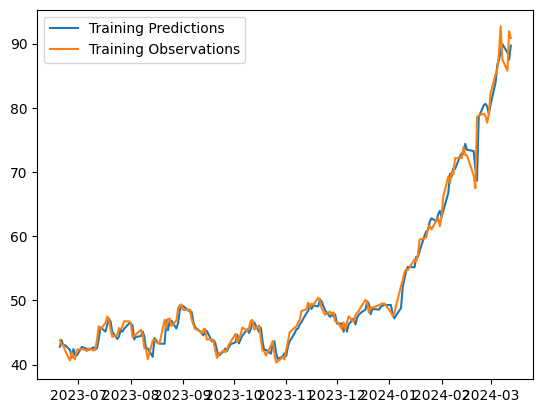

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 24ms/step


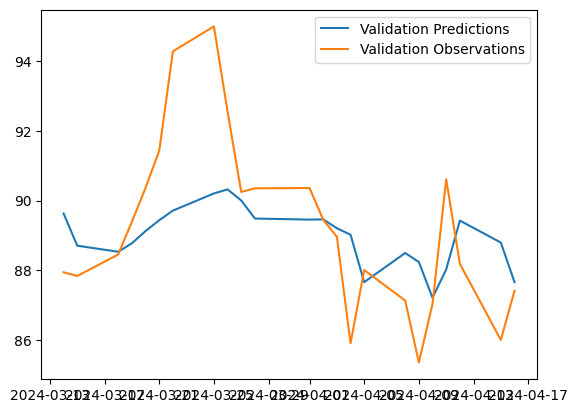

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


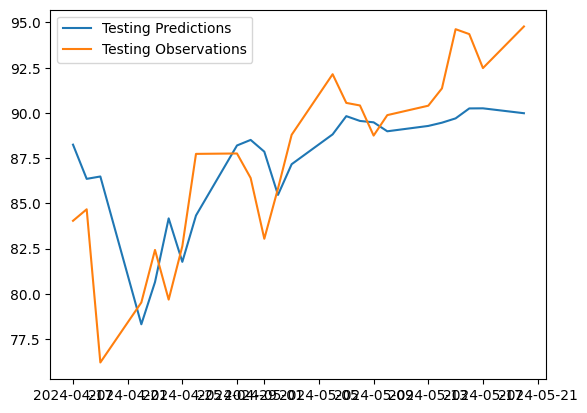

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

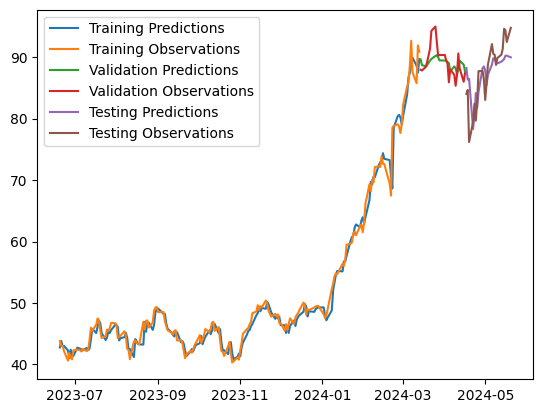

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


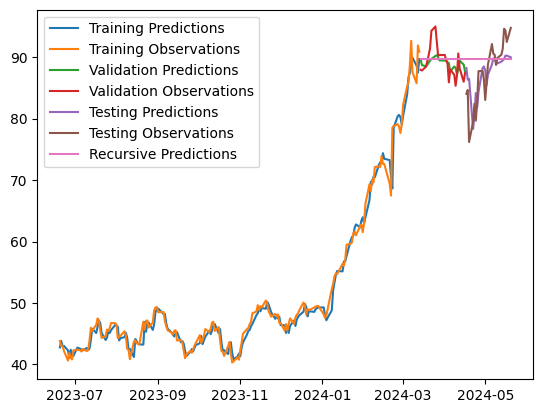

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:
# Function to get future predictions
def get_future_predictions(model, last_window, num_predictions):
    predictions = []
    window = deepcopy(last_window)

    for _ in range(num_predictions):
        next_prediction = model.predict(np.array([window])).flatten()
        predictions.append(next_prediction[0])
        window = np.roll(window, -1)
        window[-1] = next_prediction[0]

    return predictions


In [ ]:
# Check the last few rows of the dataframe to verify available dates and prices
print(df.tail(10))


                 Close
Date                  
2024-06-06  120.998001
2024-06-07  120.888000
2024-06-10  121.790001
2024-06-11  120.910004
2024-06-12  125.199997
2024-06-13  129.610001
2024-06-14  131.880005
2024-06-17  130.979996
2024-06-18  135.580002
2024-06-20  136.990005


In [ ]:
# Function to get future predictions
def get_future_predictions(model, last_window, num_predictions):
    predictions = []
    window = deepcopy(last_window)

    for _ in range(num_predictions):
        next_prediction = model.predict(np.array([window])).flatten()
        predictions.append(next_prediction[0])
        window = np.roll(window, -1)
        window[-1] = next_prediction[0]

    return predictions

# Generate predictions for the next 1 week (7 days), 1 fortnight (14 days), and 1 month (30 days)
predictions_1_week = generate_predictions('2024-06-20', 7, model, df)
predictions_1_fortnight = generate_predictions('2024-06-20', 14, model, df)
predictions_1_month = generate_predictions('2024-06-20', 30, model, df)

# Print predections
print(predictions_1_week)
print(predictions_1_fortnight)
print(predictions_1_month)


1/1 [==============================] - 0s 22ms/step
[84.76307, 85.960335, 85.63297, 85.664955, 85.65992, 85.660545, 85.660446]
[84.76307, 85.960335, 85.63297, 85.664955, 85.65992, 85.660545, 85.660446, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046]
[84.76307, 85.960335, 85.63297, 85.664955, 85.65992, 85.660545, 85.660446, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046]


In [ ]:
df

,Close
Date,
1999-01-22,0.041016
1999-01-25,0.045313
1999-01-26,0.041797
1999-01-27,0.041667
1999-01-28,0.041536
...,...
2024-06-13,129.610001
2024-06-14,131.880005
2024-06-17,130.979996


In [ ]:
# Ensure index is datetime (if not already)
df.index = pd.to_datetime(df.index)


In [ ]:
# Filter data for the desired time range (from 2024-05-21 to 2024-06-20)
start_date = '2024-05-21'
end_date = '2024-06-20'

filtered_data = df.loc[start_date:end_date]


In [ ]:
# Calculate 1 week, 1 fortnight (2 weeks), and 1 month intervals
one_week_end = pd.date_range(start=start_date, periods=6, freq='B').max()
one_fortnight_end = pd.date_range(start=start_date, periods=11, freq='B').max()
one_month_end = pd.date_range(start=start_date, periods=20, freq='B').max()

# Get the 'Close' values for each interval
close_1_week = filtered_data.loc[start_date:one_week_end]['Close'].values
close_1_fortnight = filtered_data.loc[start_date:one_fortnight_end]['Close'].values
close_1_month = filtered_data.loc[start_date:one_month_end]['Close'].values


In [ ]:
print(close_1_week)
print(close_1_fortnight)
print(close_1_month)

[ 95.386002  94.949997 103.799004 106.469002 113.901001]
[ 95.386002  94.949997 103.799004 106.469002 113.901001 114.824997
 110.5      109.633003 115.       116.436996]
[ 95.386002  94.949997 103.799004 106.469002 113.901001 114.824997
 110.5      109.633003 115.       116.436996 122.440002 120.998001
 120.888    121.790001 120.910004 125.199997 129.610001 131.880005
 130.979996]


In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
predictions_1_week = [84.76307, 85.960335, 85.63297, 85.664955, 85.65992, 85.660545, 85.660446]
predictions_1_fortnight = [84.76307, 85.960335, 85.63297, 85.664955, 85.65992, 85.660545, 85.660446,
                           85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046]
predictions_1_month = [84.76307, 85.960335, 85.63297, 85.664955, 85.65992, 85.660545, 85.660446,
                       85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046,
                       85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046,
                       85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046, 85.66046]

actual_1_week = [95.386002, 94.949997, 103.799004, 106.469002, 113.901001]
actual_1_fortnight = [95.386002, 94.949997, 103.799004, 106.469002, 113.901001, 114.824997,
                      110.5, 109.633003, 115.0, 116.436996]
actual_1_month = [95.386002, 94.949997, 103.799004, 106.469002, 113.901001, 114.824997,
                  110.5, 109.633003, 115.0, 116.436996, 122.440002, 120.998001,
                  120.888, 121.790001, 120.910004, 125.199997, 129.610001, 131.880005,
                  130.979996]

# Plotting predictions vs actual values
plt.figure(figsize=(12, 6))
plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Comparison of Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.tight_layout()



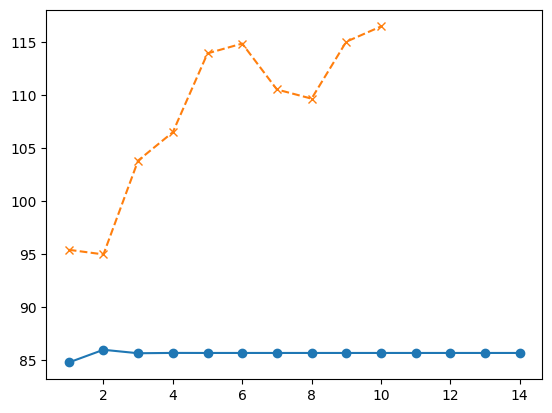

In [ ]:
# Plot 1 fortnight predictions and actual values
plt.plot(range(1, len(predictions_1_fortnight) + 1), predictions_1_fortnight, label='Predictions (1 fortnight)', marker='o')
plt.plot(range(1, len(actual_1_fortnight) + 1), actual_1_fortnight, label='Actual (1 fortnight)', linestyle='--', marker='x')

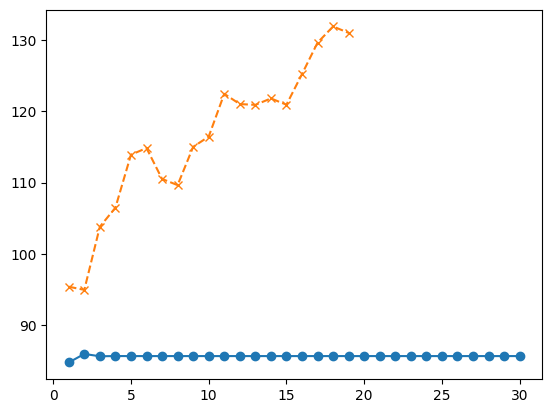

In [ ]:
# Plot 1 month predictions and actual values
plt.plot(range(1, len(predictions_1_month) + 1), predictions_1_month, label='Predictions (1 month)', marker='o')
plt.plot(range(1, len(actual_1_month) + 1), actual_1_month, label='Actual (1 month)', linestyle='--', marker='x')


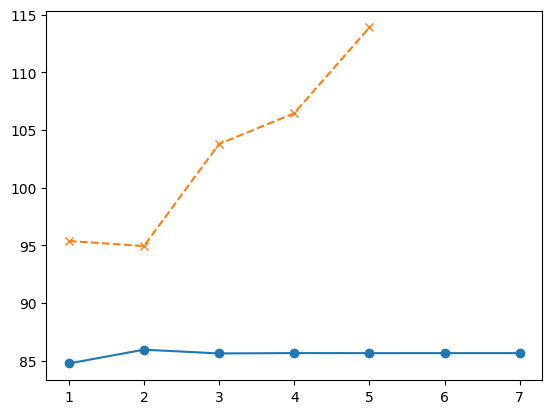

In [ ]:
# Plot 1 week predictions and actual values
plt.plot(range(1, len(predictions_1_week) + 1), predictions_1_week, label='Predictions (1 week)', marker='o')
plt.plot(range(1, len(actual_1_week) + 1), actual_1_week, label='Actual (1 week)', linestyle='--', marker='x')